### Problem Statement
[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR (Thinkful mirror).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

Propertycrime=α+Population+Population2+Murder+Robbery
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.
### Outline
1. Data preparation
2. Visualization

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_PATH = 'data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv'
df = pd.read_csv(data_PATH)
cols_to_keep = ['City', 'Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']
df_prop_crime = df[cols_to_keep]
new_cols = ['city', 'population', 'murder', 'robbery', 'property_crime']
df_prop_crime.columns = new_cols
print (len(df_prop_crime.index))
print (df_prop_crime.head(3))

348
                       city population  murder robbery property_crime
0             Adams Village      1,861       0       0             12
1  Addison Town and Village      2,577       0       0             24
2             Akron Village      2,846       0       0             16


In [3]:
df_nans = df_prop_crime.isnull().sum()
df_zeros = (df_prop_crime == 0).sum()
print (df_nans)
print (df_zeros)
print (df_prop_crime.dtypes)

city              0
population        0
murder            0
robbery           0
property_crime    0
dtype: int64
city                0
population          0
murder            299
robbery             0
property_crime      0
dtype: int64
city              object
population        object
murder             int64
robbery           object
property_crime    object
dtype: object


In [4]:
df_prop_crime['population'] = df_prop_crime['population'].str.replace(',','')
df_prop_crime['robbery'] = df_prop_crime['robbery'].str.replace(',','')
df_prop_crime['property_crime'] = df_prop_crime['property_crime'].str.replace(',','')

df_prop_crime['population'] = df_prop_crime['population'].astype(float)
df_prop_crime['robbery'] = df_prop_crime['robbery'].astype(float)
df_prop_crime['property_crime'] = df_prop_crime['property_crime'].astype(float)

In [5]:
df_prop_crime['murder'] = np.array(df_prop_crime['murder'] > 0, dtype = int)
df_prop_crime['robbery'] = np.array(df_prop_crime['robbery'] > 0, dtype = int)

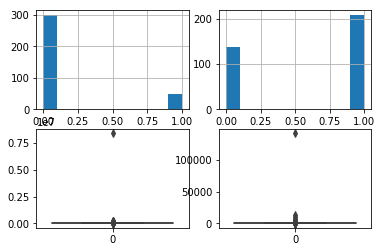

The features murder and robbery show binomial distributions. Where robbery slighlty skewed towards 1, murder is heavily skewed towards 0. This asymmetry may affect our model, so it is important to note it here. 
The bottom two plots show serious outliers, ones that skew the boxplot to a thin line.


In [6]:
# distributions of bimodals murder and robbery and normals population and property_crime
fig_dist, ax_dist = plt.subplots(2,2)
df_prop_crime['murder'].hist(ax = ax_dist[0,0])
df_prop_crime['robbery'].hist(ax = ax_dist[0,1])
sns.boxplot(data = df_prop_crime['population'], ax = ax_dist[1,0])
sns.boxplot(data = df_prop_crime['property_crime'], ax = ax_dist[1,1])
plt.show()
# discussion
print ("The features murder and robbery show binomial distributions. Where robbery slighlty skewed towards 1, murder is heavily skewed towards 0. This asymmetry may affect our model, so it is important to note it here. \nThe bottom two plots show serious outliers, ones that skew the boxplot to a thin line.")

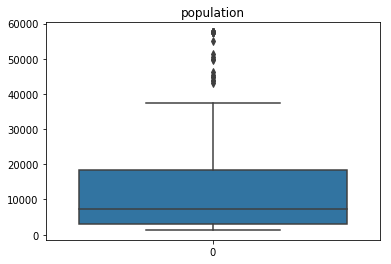

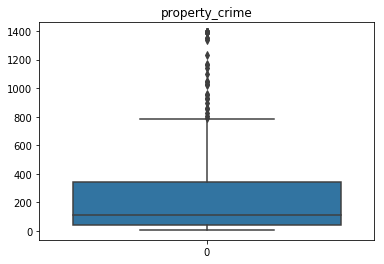

After winsorizing, the data is much more manageable. THe data is still skewed more towards lower values, but the outliers are not as extreme. Since there may actually be a way to indicate the high property crime from similarly high population, then the high-valued outliers may be able to positively influence our model.


In [7]:
# winsorize population, property crime and population_squared
from scipy.stats.mstats import winsorize
df_prop_crime['population'] = winsorize(df_prop_crime['population'], limits = [0.05, 0.05])
df_prop_crime['property_crime'] = winsorize(df_prop_crime['property_crime'], limits = [0.05, 0.05])
sns.boxplot(data = df_prop_crime['population'])
plt.title('population')
plt.show()
sns.boxplot(data = df_prop_crime['property_crime'])
plt.title('property_crime')
plt.show()
# discussion
print ("After winsorizing, the data is much more manageable. THe data is still skewed more towards lower values, but the outliers are not as extreme. Since there may actually be a way to indicate the high property crime from similarly high population, then the high-valued outliers may be able to positively influence our model.")

In [8]:
df_prop_crime['population_squared'] = df_prop_crime['population']**2

In [9]:
df_prop_crime.describe()

,population,murder,robbery,property_crime,population_squared
count,348.000000,348.000000,348.000000,348.000000,3.480000e+02
mean,13620.954023,0.140805,0.600575,280.491379,4.168966e+08
std,15232.628855,0.348321,0.490486,376.367198,8.327466e+08
min,1350.000000,0.000000,0.000000,8.000000,1.822500e+06
25%,3003.000000,0.000000,0.000000,40.500000,9.018117e+06
50%,7233.500000,0.000000,1.000000,112.500000,5.232568e+07
75%,18427.500000,0.000000,1.000000,341.000000,3.397536e+08
max,57559.000000,1.000000,1.000000,1391.000000,3.313038e+09
